#Importing Dependencies

In [ ]:
!pip install -U transformers tensorflow tf-keras tensorflow_addons contractions emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
import gdown
import contractions
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import gc
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_recall_fscore_support, roc_curve, auc
from transformers import AdamWeightDecay, TFBertModel, BertConfig, BertTokenizer ,InputExample, InputFeatures ,TFBertForSequenceClassification
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau ,ModelCheckpoint
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.metrics import Precision, Recall
from google.colab import files
import warnings
import time
import os
from datetime import datetime
from tensorflow.keras.layers import (Input, LSTM, Dense, Dropout, Bidirectional, Attention,
                                     GlobalAveragePooling1D, Embedding ,BatchNormalization ,SpatialDropout1D,
                                     Reshape, Activation, GlobalMaxPooling1D, Concatenate)

In [ ]:
# Ensure punkt is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.19.0


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"heshamalsaadi","key":"3668e4ef1bf41df07b27db2cec059f92"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Loading Datasets

##Sentiment140 dataset with 1.6 million tweets

In [ ]:
# Replace 'your_shareable_link' with the actual shareable link
file_url = 'https://drive.google.com//uc?export=download&id=1qII5FQCBQ88YD17jTzqr6g_uOPzEqapA'
output = 'training.1600000.processed.noemoticon.csv'
gdown.download(file_url, output, quiet=False)

Downloading...
From (original): https://drive.google.com//uc?export=download&id=1qII5FQCBQ88YD17jTzqr6g_uOPzEqapA
From (redirected): https://drive.google.com/uc?export=download&id=1qII5FQCBQ88YD17jTzqr6g_uOPzEqapA&confirm=t&uuid=2b07d437-0d6b-4575-a1dc-56fff8fcd09c
To: /content/training.1600000.processed.noemoticon.csv
100%|██████████| 239M/239M [00:04<00:00, 58.0MB/s]


'training.1600000.processed.noemoticon.csv'

In [ ]:
file_path = '/content/training.1600000.processed.noemoticon.csv'
DATASET_COLUMNS = ["sentiment", "ids", "date", "flag", "user", "text"]

In [ ]:
# Load the CSV file into a DataFrame
df_Sentiment140_dataset = pd.read_csv(file_path, encoding='ISO-8859-1', names=DATASET_COLUMNS)
df_Sentiment140_dataset = df_Sentiment140_dataset.drop(['ids', 'date', 'flag', 'user'], axis=1)

In [ ]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df_Sentiment140_dataset.sentiment = df_Sentiment140_dataset.sentiment.apply(lambda x: label_decoder(x))
df_Sentiment140_dataset = df_Sentiment140_dataset[['text', 'sentiment']]
df_Sentiment140_dataset

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,is upset that he can't update his Facebook by ...,Negative
2,@Kenichan I dived many times for the ball. Man...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,"@nationwideclass no, it's not behaving at all....",Negative
...,...,...
1599995,Just woke up. Having no school is the best fee...,Positive
1599996,TheWDB.com - Very cool to hear old Walt interv...,Positive
1599997,Are you ready for your MoJo Makeover? Ask me f...,Positive
1599998,Happy 38th Birthday to my boo of alll time!!! ...,Positive


##IMDB Vision and NLP

In [ ]:
!kaggle datasets download -d raynardj/imdb-vision-and-nlp

Dataset URL: https://www.kaggle.com/datasets/raynardj/imdb-vision-and-nlp
License(s): GPL-2.0
 91% 381M/420M [00:00<00:00, 406MB/s]
100% 420M/420M [00:02<00:00, 151MB/s]


In [ ]:
!unzip imdb-vision-and-nlp.zip

Archive:  imdb-vision-and-nlp.zip
  inflating: __notebook_source__.ipynb  
  inflating: images/images/100029_.jpg  
  inflating: images/images/1000774_.jpg  
  inflating: images/images/100114_.jpg  
  inflating: images/images/1001508_.jpg  
  inflating: images/images/100150_.jpg  
  inflating: images/images/1001526_.jpg  
  inflating: images/images/100157_.jpg  
  inflating: images/images/100258_.jpg  
  inflating: images/images/100260_.jpg  
  inflating: images/images/100318_.jpg  
  inflating: images/images/100403_.jpg  
  inflating: images/images/100404_.jpg  
  inflating: images/images/100405_.jpg  
  inflating: images/images/100502_.jpg  
  inflating: images/images/100507_.jpg  
  inflating: images/images/1007028_.jpg  
  inflating: images/images/1007029_.jpg  
  inflating: images/images/100758_.jpg  
  inflating: images/images/100802_.jpg  
  inflating: images/images/100814_.jpg  
  inflating: images/images/100935_.jpg  
  inflating: images/images/100944_.jpg  
  inflating: image

In [ ]:
file_path = '/content/reviews.csv'
df_IMDB = pd.read_csv(file_path)
df_IMDB

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw1133942,OriginalMovieBuff21,Kill Bill: Vol. 2 (2004),8.0,Good follow up that answers all the questions,24 July 2005,0,"After seeing Tarantino's Kill Bill Vol: 1, I g...","['0', '1']"
1,rw1133959,lost-in-limbo,Feardotcom (2002),3.0,"""I couldn't make much sense of it myself"". Too...",24 July 2005,0,There's a Website called FearDotCom and anyone...,"['1', '4']"
2,rw1133985,NateManD,Persona (1966),10.0,Persona gives me all the reasons to love art-h...,24 July 2005,0,"Long before ""Muholland Drive"" there was anothe...","['9', '23']"
3,rw1133999,CAMACHO-4,War of the Worlds (2005),3.0,A disappointing film from the team that you Mi...,24 July 2005,0,Spielberg said this film is based on the H.G. ...,"['9', '14']"
4,rw1134010,CAMACHO-4,Mr. & Mrs. Smith (2005),6.0,A fun action movie with great chemistry,24 July 2005,0,"Director Doug Liman, who's gotten famous for m...","['1', '3']"
...,...,...,...,...,...,...,...,...,...
542456,rw1012552,JamesHitchcock,Stepmom (1998),5.0,What Would Scriptwriters Do Without Terminal I...,2 February 2005,1,Stepmom gets off to quite a promising start. L...,"['6', '12']"
542457,rw1012555,zardoz-13,Coach Carter (2005),8.0,"""Coach Carter"" makes the grade!!!",2 February 2005,1,Every conscientious high school educator ought...,"['0', '1']"
542458,rw1012557,zardoz-13,Alone in the Dark (2005),5.0,"""Alone in the Dark"" is a moan of a lark",2 February 2005,1,You know when a movie is in trouble when its f...,"['2', '7']"
542459,rw1012561,philip_vanderveken,Garfield (2004),4.0,This has nothing to do with the cartoon cat th...,2 February 2005,0,I've known the Garfield comic all my life (Gar...,"['2', '5']"


In [ ]:
# Filter rows where rating is between 4 and 7
df_IMDB_filtered = df_IMDB[(df_IMDB['rating'] >= 4) & (df_IMDB['rating'] <= 7)]
df_IMDB_filtered['sentiment'] = 'neutral'

<ipython-input-14-c351528fde19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMDB_filtered['sentiment'] = 'neutral'


In [ ]:
# Check the unique values in the 'rating' column
print(df_IMDB_filtered['rating'].unique())

# Check the shape of the filtered DataFrame
print(df_IMDB_filtered.shape)
df_IMDB_filtered

[6. 7. 4. 5.]
(203945, 10)


,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,sentiment
4,rw1134010,CAMACHO-4,Mr. & Mrs. Smith (2005),6.0,A fun action movie with great chemistry,24 July 2005,0,"Director Doug Liman, who's gotten famous for m...","['1', '3']",neutral
5,rw1134035,cshep,Christine (1983),7.0,Bullied Student Gets REVENGE !!!,24 July 2005,1,Joh Carpenter directs this early 80's Stephen ...,"['1', '1']",neutral
12,rw1134121,sol-,The Upside of Anger (2005),4.0,My brief review of the film,24 July 2005,0,Aggression is something that many of us have n...,"['1', '2']",neutral
14,rw1134149,sol-,Anything Else (2003),7.0,My brief review of the film,24 July 2005,0,This may not be as funny or as deep as some of...,"['5', '9']",neutral
16,rw1134153,ma-cortes,The Alamo (2004),7.0,Interesting rendition of the mythic Alamo miss...,24 July 2005,0,Epic western upon the state of Texas's fight f...,"['20', '21']",neutral
...,...,...,...,...,...,...,...,...,...,...
542454,rw1012547,Bob-45,Shenandoah (1965),7.0,Weakened By Production Values and Coincidence,2 February 2005,0,Charley Anderson (James Stewart) is the widowe...,"['8', '17']",neutral
542455,rw1012551,mjw2305,Sphere (1998),5.0,Cheat!,2 February 2005,1,"With a good cast, a writer with a pedigree and...","['2', '5']",neutral
542456,rw1012552,JamesHitchcock,Stepmom (1998),5.0,What Would Scriptwriters Do Without Terminal I...,2 February 2005,1,Stepmom gets off to quite a promising start. L...,"['6', '12']",neutral
542458,rw1012557,zardoz-13,Alone in the Dark (2005),5.0,"""Alone in the Dark"" is a moan of a lark",2 February 2005,1,You know when a movie is in trouble when its f...,"['2', '7']",neutral


In [ ]:
df_IMDB_filtered = df_IMDB_filtered.drop(['review_id', 'reviewer', 'movie', 'review_date','spoiler_tag','helpful', 'review_summary', 'rating'], axis=1)
df_IMDB_filtered.rename(columns={'review_detail': 'text'}, inplace=True)
df_IMDB_filtered

,text,sentiment
4,"Director Doug Liman, who's gotten famous for m...",neutral
5,Joh Carpenter directs this early 80's Stephen ...,neutral
12,Aggression is something that many of us have n...,neutral
14,This may not be as funny or as deep as some of...,neutral
16,Epic western upon the state of Texas's fight f...,neutral
...,...,...
542454,Charley Anderson (James Stewart) is the widowe...,neutral
542455,"With a good cast, a writer with a pedigree and...",neutral
542456,Stepmom gets off to quite a promising start. L...,neutral
542458,You know when a movie is in trouble when its f...,neutral


###Deleting Unwated Files and Folders

In [ ]:
import os

# List all files and folders in the current directory
for root, dirs, files in os.walk('.'):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

./kaggle.json
./imdb-vision-and-nlp.zip
./__notebook_source__.ipynb
./training.1600000.processed.noemoticon.csv
./movies.csv
./reviews.csv
./.config
./images
./sample_data
./.config/.last_survey_prompt.yaml
./.config/config_sentinel
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/default_configs.db
./.config/.last_update_check.json
./.config/active_config
./.config/.last_opt_in_prompt.yaml
./.config/gce
./.config/logs
./.config/configurations
./.config/logs/2025.06.05
./.config/logs/2025.06.05/13.37.50.659801.log
./.config/logs/2025.06.05/13.37.29.893875.log
./.config/logs/2025.06.05/13.38.10.544873.log
./.config/logs/2025.06.05/13.37.59.873672.log
./.config/logs/2025.06.05/13.38.01.160966.log
./.config/logs/2025.06.05/13.38.11.288440.log
./.config/configurations/config_default
./images/images
./images/images/88194_.jpg
./images/images/2911666_.jpg
./images/images/113987_.jpg
./images/images/411061_.jpg
./images/images/71249_.jpg
./images/images/16878

In [ ]:
# List of files to delete
files_to_delete = ['__notebook_source__.ipynb', 'movies.csv', 'imdb-vision-and-nlp.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: __notebook_source__.ipynb
Deleted: movies.csv
Deleted: imdb-vision-and-nlp.zip


In [ ]:
import shutil

# List of folders to delete
folders_to_delete = ['images']

for folder in folders_to_delete:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted: {folder}")
    else:
        print(f"Folder not found: {folder}")

Deleted: images


##Twitter Sentiment Dataset

In [ ]:
!kaggle datasets download -d saurabhshahane/twitter-sentiment-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/7.60M [00:00<?, ?B/s]
100% 7.60M/7.60M [00:00<00:00, 957MB/s]


In [ ]:
!unzip twitter-sentiment-dataset.zip

Archive:  twitter-sentiment-dataset.zip
  inflating: Twitter_Data.csv        


In [ ]:
import os
# List of files to delete
files_to_delete = ['twitter-sentiment-dataset.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-sentiment-dataset.zip


In [ ]:
file_path = '/content/Twitter_Data.csv'
df_Twitter_Data = pd.read_csv(file_path)
df_Twitter_Data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df_Twitter_Data_filtered = df_Twitter_Data[(df_Twitter_Data['category'] == 0)]
df_Twitter_Data_filtered['sentiment'] = 'neutral'
df_Twitter_Data_filtered = df_Twitter_Data_filtered.drop(['category'], axis=1)
df_Twitter_Data_filtered.rename(columns={'clean_text': 'text'}, inplace=True)
df_Twitter_Data_filtered

<ipython-input-24-329104fbb381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Twitter_Data_filtered['sentiment'] = 'neutral'


,text,sentiment
1,talk all the nonsense and continue all the dra...,neutral
5,kiya tho refresh maarkefir comment karo,neutral
6,surat women perform yagna seeks divine grace f...,neutral
7,this comes from cabinet which has scholars lik...,neutral
13,one vote can make all the difference anil kapo...,neutral
...,...,...
162968,case dont look candidate then that case person...,neutral
162971,congress veteran sudhakar reddy joins bjp afte...,neutral
162974,save your agenda peddling ’ had with terror at...,neutral
162977,did you cover her interaction forum where she ...,neutral


##Reddit Sentimental analysis Dataset

In [ ]:
!kaggle datasets download -d cosmos98/twitter-and-reddit-sentimental-analysis-dataset

Dataset URL: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/10.0M [00:00<?, ?B/s]
100% 10.0M/10.0M [00:00<00:00, 1.14GB/s]


In [ ]:
!unzip twitter-and-reddit-sentimental-analysis-dataset.zip
#Answer (n)

Archive:  twitter-and-reddit-sentimental-analysis-dataset.zip
  inflating: Reddit_Data.csv         
replace Twitter_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# List of files to delete
files_to_delete = ['twitter-and-reddit-sentimental-analysis-dataset.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-and-reddit-sentimental-analysis-dataset.zip


In [ ]:
file_path = '/content/Reddit_Data.csv'
df_Reddit_Data = pd.read_csv(file_path)
df_Reddit_Data

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
df_Reddit_Data_filtered = df_Reddit_Data[(df_Reddit_Data['category'] == 0)]
df_Reddit_Data_filtered['sentiment'] = 'neutral'
df_Reddit_Data_filtered = df_Reddit_Data_filtered.drop(['category'], axis=1)
df_Reddit_Data_filtered.rename(columns={'clean_comment': 'text'}, inplace=True)
df_Reddit_Data_filtered

<ipython-input-29-0fe9c9de3561>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Reddit_Data_filtered['sentiment'] = 'neutral'


,text,sentiment
3,what you have learned yours and only yours wha...,neutral
7,jesus was zen meets jew,neutral
18,zarus,neutral
19,blood and souls for lord arioch,neutral
25,his name shall lump wherever lumps are there w...,neutral
...,...,...
37241,let the janta decide not ulema clerics,neutral
37242,hona hai same with vaccination education insu...,neutral
37244,jesus,neutral
37246,downvote karna tha par upvote hogaya,neutral


##Emotions Dataset

In [ ]:
!kaggle datasets download -d nelgiriyewithana/emotions

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
License(s): other
  0% 0.00/15.7M [00:00<?, ?B/s]
100% 15.7M/15.7M [00:00<00:00, 1.17GB/s]


In [ ]:
!unzip emotions.zip

Archive:  emotions.zip
  inflating: text.csv                


In [ ]:
# List of files to delete
files_to_delete = ['emotions.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: emotions.zip


In [ ]:
file_path = '/content/text.csv'
df_emotions = pd.read_csv(file_path)
df_emotions

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
df_emotions_filtered = df_emotions[(df_emotions['label'] >= 1) & (df_emotions['label'] <= 4)]
df_emotions_filtered['sentiment'] = 'neutral'
df_emotions_filtered = df_emotions_filtered.drop(['label', 'Unnamed: 0'], axis=1)
df_emotions_filtered

<ipython-input-34-f62441a5aec3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emotions_filtered['sentiment'] = 'neutral'


,text,sentiment
0,i just feel really helpless and heavy hearted,neutral
2,i gave up my internship with the dmrg and am f...,neutral
4,i am a kindergarten teacher and i am thoroughl...,neutral
6,i would think that whomever would be lucky eno...,neutral
7,i fear that they won t ever feel that deliciou...,neutral
...,...,...
416802,i feel like i have been neglecting you my fait...,neutral
416803,i cry and feel a sense of loss when my patient...,neutral
416804,i feel like telling these horny devils to find...,neutral
416805,i began to realize that when i was feeling agi...,neutral


##Twitter Sentiment Analysis Dataset

In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 141MB/s]


In [ ]:
!unzip twitter-entity-sentiment-analysis.zip

Archive:  twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [ ]:
# List of files to delete
files_to_delete = ['twitter-entity-sentiment-analysis.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-entity-sentiment-analysis.zip


In [ ]:
file_path = '/content/twitter_training.csv'
df_twitter_training = pd.read_csv(file_path)
print(df_twitter_training.columns)
df_twitter_training

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
file_path = '/content/twitter_validation.csv'
df_twitter_validation = pd.read_csv(file_path)
print(df_twitter_validation.columns)
df_twitter_validation

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Remove column names (reset to default numeric index)
df_twitter_training.columns = range(df_twitter_training.shape[1])  # Reset column names to 0, 1, 2, ...
df_twitter_validation.columns = range(df_twitter_validation.shape[1])  # Reset column names to 0, 1, 2, ...

In [ ]:
# Combine the DataFrames
combined_df = pd.concat([df_twitter_training, df_twitter_validation], ignore_index=True)

# Add meaningful column names
combined_df.columns = ['id', 'ni', 'rate', 'text']

print("Combined DataFrame with meaningful column names:")
combined_df

Combined DataFrame with meaningful column names:


,id,ni,rate,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
75675,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75678,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df_combined_twitter_filtered = combined_df[(combined_df['rate'] == 'Neutral')]
df_combined_twitter_filtered['sentiment'] = 'neutral'
df_combined_twitter_filtered = df_combined_twitter_filtered.drop(['rate', 'ni', 'id'], axis=1)
df_combined_twitter_filtered

<ipython-input-29-2750cd53c734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_twitter_filtered['sentiment'] = 'neutral'


,text,sentiment
11,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
12,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
13,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
14,"Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",neutral
15,"Live Rock - Hard music La la Varlope, RARE & t...",neutral
...,...,...
75657,This is....odd. @Google suggests the most dead...,neutral
75665,@6th__man playing red dead redemption-\n\n“Oh ...,neutral
75668,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,neutral
75671,Late night stream with the boys! Come watch so...,neutral


In [ ]:
df_combined_twitter_filtered

,text,sentiment
11,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
12,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
13,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
14,"Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",neutral
15,"Live Rock - Hard music La la Varlope, RARE & t...",neutral
...,...,...
75657,This is....odd. @Google suggests the most dead...,neutral
75665,@6th__man playing red dead redemption-\n\n“Oh ...,neutral
75668,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,neutral
75671,Late night stream with the boys! Come watch so...,neutral


------------------------------------------------------------------------------------

#Dataset Preprocessing

In [ ]:
'''
df_combined_twitter_filtered
df_emotions_filtered x
df_Reddit_Data_filtered
df_Twitter_Data_filtered
df_IMDB_filtered x
df_Sentiment140_dataset
'''
all_data_df = pd.concat([df_combined_twitter_filtered, df_emotions_filtered, df_Reddit_Data_filtered, df_Twitter_Data_filtered,
                         df_IMDB_filtered, df_Sentiment140_dataset], ignore_index=True)
all_data_df_shuffled = all_data_df.sample(frac=1, random_state=42).reset_index(drop=True)
all_data_df_shuffled

,text,sentiment
0,me cleaan,Positive
1,@roborobb I call them gladiator sandals,Positive
2,@tylerosby I tried to test it out but you answ...,Positive
3,"C'mon pple, let's start writing this app BPD",Positive
4,@egower Awww thank you for the #ff &lt;3!!! I...,Negative
...,...,...
1668350,Watching the tonight show with jay leno- his l...,Negative
1668351,@yourfallenangel i'm proud of u baby. I'm sure...,Positive
1668352,"I hope i get that job in medowhall , i need a ...",Negative
1668353,Mixed emotions about changing job assignments....,Negative


In [ ]:
all_data_df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668355 entries, 0 to 1668354
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   text       1668253 non-null  object
 1   sentiment  1668355 non-null  object
dtypes: object(2)
memory usage: 25.5+ MB


In [ ]:
# Check current class distribution
original_distribution = all_data_df_shuffled['sentiment'].value_counts(normalize=True)
print("Original Class Distribution:")
print(original_distribution)

Original Class Distribution:
sentiment
Positive    0.479514
Negative    0.479514
neutral     0.040971
Name: proportion, dtype: float64


In [ ]:
TARGET_SAMPLE_SIZE = 300_000
SAMPLES_PER_CLASS = TARGET_SAMPLE_SIZE // 3  # 100,000 per class

# Get unique sentiment classes
sentiment_classes = all_data_df_shuffled['sentiment'].unique()

# Check if we have enough samples in each class
for cls in sentiment_classes:
    class_count = len(all_data_df_shuffled[all_data_df_shuffled['sentiment'] == cls])
    if class_count < SAMPLES_PER_CLASS:
        raise ValueError(f"Class {cls} only has {class_count} samples, need at least {SAMPLES_PER_CLASS}")

# Create balanced sample
all_data_df_shuffled = pd.concat([
    all_data_df_shuffled[all_data_df_shuffled['sentiment'] == cls]
    .sample(n=SAMPLES_PER_CLASS, random_state=42)
    for cls in sentiment_classes
])

# Final shuffle
all_data_df_shuffled = all_data_df_shuffled.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify distribution
print("Final class distribution:")
print(all_data_df_shuffled['sentiment'].value_counts(normalize=True))
print("\nAbsolute counts:")
print(all_data_df_shuffled['sentiment'].value_counts())

ValueError: Class Positive only has 33333 samples, need at least 100000

In [ ]:
# Check for null values in the 'text' column
null_count = all_data_df_shuffled['text'].isnull().sum()
print(f"Number of null values in 'text' column: {null_count}")

Number of null values in 'text' column: 102


In [ ]:
# Drop rows with null values in the 'text' column
all_data_df_shuffled = all_data_df_shuffled.dropna(subset=['text'])

# Verify that null values are removed
print(f"Number of null values after dropping: {all_data_df_shuffled['text'].isnull().sum()}")

Number of null values after dropping: 0


Text(0.5, 1.0, 'target Data Distribution')

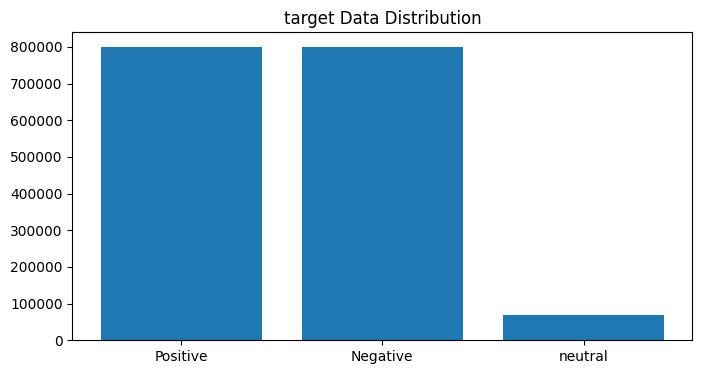

In [ ]:
val_count = all_data_df_shuffled.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("target Data Distribution")

In [ ]:
# Create a mapping dictionary
sentiment_mapping = {
    'Negative': -1,
    'neutral': 0,
    'Positive': 1
}

In [ ]:
all_data_df_shuffled['sentiment_numeric'] = all_data_df_shuffled['sentiment'].map(sentiment_mapping)

<ipython-input-42-9a7240b2046a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_df_shuffled['sentiment_numeric'] = all_data_df_shuffled['sentiment'].map(sentiment_mapping)


##Text Preprocessing

In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
# 1. Split Data
train_df, temp_df = train_test_split(all_data_df_shuffled, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.333, random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 69910
Validation set size: 19984
Testing set size: 9978


In [ ]:
# Create a mapping dictionary
sentiment_mapping = {
    'Negative': -1,
    'neutral': 0,
    'Positive': 1
}

In [ ]:
# Apply the mapping to your DataFrames
train_df['sentiment_numeric'] = train_df['sentiment'].map(sentiment_mapping)
val_df['sentiment_numeric'] = val_df['sentiment'].map(sentiment_mapping)
test_df['sentiment_numeric'] = test_df['sentiment'].map(sentiment_mapping)

In [ ]:
# Verify the distribution
print("Training set distribution:")
print(train_df['sentiment_numeric'].value_counts())

print("\nValidation set distribution:")
print(val_df['sentiment_numeric'].value_counts())

print("\nTesting set distribution:")
print(test_df['sentiment_numeric'].value_counts())

Training set distribution:
sentiment_numeric
-1    23381
 1    23321
 0    23208
Name: count, dtype: int64

Validation set distribution:
sentiment_numeric
 1    6728
-1    6635
 0    6621
Name: count, dtype: int64

Testing set distribution:
sentiment_numeric
 0    3377
-1    3317
 1    3284
Name: count, dtype: int64


In [ ]:
# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=True):
    """
    Preprocesses the text by:
    1. Converting emojis to text.
    2. Expanding contractions.
    3. Cleaning hyperlinks, mentions, and special characters.
    4. Converting text to lowercase.
    5. Tokenizing and removing stopwords.
    6. Applying stemming (if stem=True).
    """
    if not text or pd.isna(text):
        return ""
    try:
        # Convert emojis to text
        text = emoji.demojize(text)
        # Expand contractions
        text = contractions.fix(text)
        # Clean text (remove hyperlinks, mentions, and special characters)
        text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
        # Remove non-ASCII characters
        text = text.encode('ascii', 'ignore').decode('utf-8')
        # Skip if text is empty after cleaning
        if not text:
            return ""
        # Tokenize
        tokens = word_tokenize(text)
        # Remove empty tokens and stopwords
        tokens = [token.strip() for token in tokens if token.strip() and token not in stop_words]
        # Apply stemming with error handling
        if stem:
            stemmed_tokens = []
            for token in tokens:
                try:
                    stemmed_token = stemmer.stem(token)
                    if stemmed_token.strip():  # Skip empty stems
                        stemmed_tokens.append(stemmed_token)
                except Exception as e:
                    print(f"Error stemming token: '{token}'\nError: {e}")
                    continue
            tokens = stemmed_tokens
        return " ".join(tokens)
    except Exception as e:
        print(f"Error preprocessing text: '{text}'\nError: {e}")
        return ""

In [ ]:
# Preprocess the training set
train_df['text'] = train_df['text'].apply(preprocess)

# Preprocess the validation set
val_df['text'] = val_df['text'].apply(preprocess)

# Preprocess the testing set
test_df['text'] = test_df['text'].apply(preprocess)

In [ ]:
null_count = train_df['text'].isnull().sum()
print(f"Number of null values in train_df: {null_count}")
null_count = val_df['text'].isnull().sum()
print(f"Number of null values in val_df: {null_count}")
null_count = test_df['text'].isnull().sum()
print(f"Number of null values in test_df: {null_count}")

Number of null values in train_df: 0
Number of null values in val_df: 0
Number of null values in test_df: 0


In [ ]:
# Drop rows with empty preprocessed text
train_df = train_df[train_df['text'].str.len() > 0]
val_df = val_df[val_df['text'].str.len() > 0]
test_df = test_df[test_df['text'].str.len() > 0]

##Vectorization

In [ ]:
# Check if GPU is available
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT available")

GPU is available


In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
batch_size = 720  # Adjust based on your GPU memory

In [ ]:
def process_batch(texts, tokenizer, bert_model, max_length=128):
    """Convert a batch of texts to BERT embeddings."""
    inputs = tokenizer(
        texts,
        padding=True,
        truncation=True,
        return_tensors='tf',
        max_length=max_length
    )
    outputs = bert_model(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask']
    )
    return outputs.last_hidden_state[:, 0, :].numpy()  # [CLS] token embeddings

def process_entire_dataset(df):
    """Process entire dataset and return embeddings in memory"""
    embeddings = []
    for i in tqdm(range(0, len(df), batch_size)):
        batch_texts = df['text'].iloc[i:i + batch_size].tolist()
        batch_embeddings = process_batch(batch_texts, tokenizer, bert_model)
        embeddings.append(batch_embeddings)

    # Combine all batches
    return np.vstack(embeddings)

# Process entire dataset and store in memory
print("Processing full dataset...")
X_train = process_entire_dataset(train_df)

# Now you can use X_train_full directly in your code
print(f"Embeddings shape: {X_train_full.shape}")

GPU is available


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Processing full dataset...


100%|██████████| 97/97 [10:28<00:00,  6.48s/it]

Embeddings shape: (69726, 768)


In [ ]:
# Reuse the same processing function for all datasets
def process_entire_dataset(df):
    """Process dataset and return embeddings in memory"""
    embeddings = []
    for i in tqdm(range(0, len(df), batch_size)):
        batch_texts = df['text'].iloc[i:i + batch_size].tolist()
        batch_embeddings = process_batch(batch_texts, tokenizer, bert_model)
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

# Process test data
print("\nProcessing test dataset...")
X_test = process_entire_dataset(test_df)
print(f"Test embeddings shape: {X_test_full.shape}")

# Process validation data
print("\nProcessing validation dataset...")
X_val = process_entire_dataset(val_df)
print(f"Validation embeddings shape: {X_val_full.shape}")


Processing test dataset...


100%|██████████| 14/14 [01:31<00:00,  6.52s/it]


Test embeddings shape: (9951, 768)

Processing validation dataset...


100%|██████████| 28/28 [03:01<00:00,  6.47s/it]

Validation embeddings shape: (19936, 768)


#Model Training

In [ ]:
# Extract labels
y_train = train_df['sentiment_numeric'].values
# Extract labels
y_val = val_df['sentiment_numeric'].values

##Batch-Processed Logistic Regression

f1-score = 0.7345

In [ ]:
# ----------------------------------------
# 1. Set Up the Model for Batch Training
# ----------------------------------------

# Create a logistic regression model using SGD with 'saga' solver
# Note: This setup is efficient for large datasets and supports partial_fit

model = SGDClassifier(
    loss='log_loss',        # Logistic regression objective
    penalty='l2',           # L2 regularization to avoid overfitting
    max_iter=1000,          # Max number of passes over data (used per batch)
    tol=1e-3,               # Tolerance for stopping criterion
    learning_rate='optimal',
    random_state=42,        # For reproducibility
    verbose=1               # Prints progress during training
)

In [ ]:
# Grab the unique class labels (needed for partial_fit)
classes = np.unique(y_train)

# Decide the batch size depending on memory constraints
batch_size = 100000  # ~300MB per batch for float32 data

In [ ]:
# ----------------------------------------
# 2. Train in Batches (Memory-Efficient)
# ----------------------------------------

n_batches = int(np.ceil(len(X_train) / batch_size))
print(f"Starting batch training with {len(X_train)} samples split into {n_batches} batches.")

# Go through the dataset multiple times to improve learning
for epoch in range(5):
    print(f"\nEpoch {epoch + 1} of 5")

    # Process each batch one by one
    for batch_idx in range(0, len(X_train), batch_size):
        # Slice the current batch from the training set
        X_batch = X_train[batch_idx:batch_idx + batch_size]
        y_batch = y_train[batch_idx:batch_idx + batch_size]

        # Update model with this batch
        model.partial_fit(X_batch, y_batch, classes=classes)

        # Clean up memory after each batch
        del X_batch, y_batch
        gc.collect()

        print(f"  Completed batch {batch_idx // batch_size + 1} of {n_batches}")

Starting batch training with 69726 samples in 1 batches...

Epoch 1/5
-- Epoch 1
Norm: 63.10, NNZs: 768, Bias: -9.986427, T: 69726, Avg. loss: 20.088785
Total training time: 0.28 seconds.
-- Epoch 1
Norm: 69.04, NNZs: 768, Bias: 2.339103, T: 69726, Avg. loss: 7.617983
Total training time: 0.32 seconds.
-- Epoch 1
Norm: 61.47, NNZs: 768, Bias: -7.679150, T: 69726, Avg. loss: 18.502123
Total training time: 0.29 seconds.
  Batch 1/1 complete

Epoch 2/5
-- Epoch 1
Norm: 38.56, NNZs: 768, Bias: -10.041600, T: 69726, Avg. loss: 2.883662
Total training time: 0.18 seconds.
-- Epoch 1
Norm: 42.31, NNZs: 768, Bias: 2.087053, T: 69726, Avg. loss: 0.868196
Total training time: 0.19 seconds.
-- Epoch 1
Norm: 37.41, NNZs: 768, Bias: -7.552527, T: 69726, Avg. loss: 2.798866
Total training time: 0.20 seconds.
  Batch 1/1 complete

Epoch 3/5
-- Epoch 1
Norm: 28.49, NNZs: 768, Bias: -9.938833, T: 69726, Avg. loss: 1.678645
Total training time: 0.30 seconds.
-- Epoch 1
Norm: 31.80, NNZs: 768, Bias: 2.024

In [ ]:
# ----------------------------------------
# 3. Make Predictions in Batches
# ----------------------------------------

all_preds = []
test_batch_size = 100000  # Keep consistent with training for efficiency

# Split validation data into chunks for prediction
for batch_idx in range(0, len(X_val), test_batch_size):
    X_val_batch = X_val[batch_idx:batch_idx + test_batch_size]
    batch_preds = model.predict(X_val_batch)
    all_preds.extend(batch_preds)

    # Free memory after processing each batch
    del X_val_batch
    gc.collect()

# Convert predictions list to NumPy array
y_pred = np.array(all_preds)

In [ ]:
# ----------------------------------------
# 4. Evaluate the Final Model
# ----------------------------------------

print("\nValidation Results:")
print(classification_report(
    y_val,
    y_pred,
    target_names=['Negative (-1)', 'Neutral (0)', 'Positive (1)'],
    digits=4
))


Test Set Performance:
               precision    recall  f1-score   support

Negative (-1)     0.7395    0.4129    0.5299      6641
  Neutral (0)     0.9185    0.8833    0.9006      6547
 Positive (1)     0.5820    0.8566    0.6930      6748

     accuracy                         0.7175     19936
    macro avg     0.7467    0.7176    0.7078     19936
 weighted avg     0.7450    0.7175    0.7069     19936



##Batch-Processed Random Forest Classifier

In [ ]:
# ----------------------------------------
# 1. Initialize the Random Forest Model
# ----------------------------------------

# Set up a Random Forest with some memory-saving options

rf_model = RandomForestClassifier(
    n_estimators=1000,     # Use 1000 trees for better performance (tweak if RAM is tight)
    max_depth=15,          # Limit tree depth to control memory usage
    max_samples=0.2,       # Each tree sees only 20% of the data (reduces memory and overfitting)
    n_jobs=-1,             # Use all available CPU cores
    random_state=42,       # For reproducibility
    verbose=1              # Print training progress
)

In [ ]:
# ----------------------------------------
# 2. Train the Model on Full Dataset
# ----------------------------------------

# Note: Random Forests require access to the entire dataset

print("Training Random Forest...")
rf_model.fit(X_train, y_train)

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  8.5min finished


RandomForestClassifier(max_depth=15, max_samples=0.2, n_estimators=1000,
                       n_jobs=-1, random_state=42, verbose=1)

In [ ]:
# ----------------------------------------
# 3. Make Predictions in Batches
# ----------------------------------------

# This helps when the validation set is too big to handle all at once
all_preds = []
test_batch_size = 50000  # Adjust based on available memory

print("\nMaking predictions in batches...")
for batch_idx in range(0, len(X_val), test_batch_size):
    X_test_batch = X_val[batch_idx:batch_idx + test_batch_size]
    batch_preds = rf_model.predict(X_test_batch)
    all_preds.extend(batch_preds)

    # Clean up memory after each batch
    del X_test_batch
    gc.collect()

    print(f"Completed batch {batch_idx // test_batch_size + 1} / "
          f"{int(np.ceil(len(X_val) / test_batch_size))}")

# Convert list of predictions to a NumPy array
y_pred = np.array(all_preds)


Making predictions in batches...


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    8.7s finished


Completed batch 1/1


In [ ]:
# ----------------------------------------
# 4. Evaluate the Model
# ----------------------------------------

print("\nValidation Results:")
print(classification_report(
    y_val,
    y_pred,
    target_names=['Negative (-1)', 'Neutral (0)', 'Positive (1)'],
    digits=4
))


Test Set Performance:
               precision    recall  f1-score   support

Negative (-1)     0.5997    0.6425    0.6204      6641
  Neutral (0)     0.8756    0.8280    0.8512      6547
 Positive (1)     0.6255    0.6146    0.6200      6748

     accuracy                         0.6940     19936
    macro avg     0.7003    0.6950    0.6972     19936
 weighted avg     0.6991    0.6940    0.6960     19936



##LSTM

In [ ]:
# ----------------------------------------
# 1. Prepare Input Data
# ----------------------------------------

# Reshape input embeddings to 3D shape expected by LSTM: (samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train, axis=1)  # Shape becomes (N, 1, 768)
X_val_lstm = np.expand_dims(X_val, axis=1)      # Shape becomes (M, 1, 768)

In [ ]:
# Convert labels from [-1, 0, 1] to one-hot vectors:
# -1 → [1, 0, 0], 0 → [0, 1, 0], 1 → [0, 0, 1]
y_train_categorical = to_categorical(y_train + 1, num_classes=3)
y_val_categorical = to_categorical(y_val + 1, num_classes=3)

In [ ]:
# ----------------------------------------
# 2. Custom F1 Score Metric
# ----------------------------------------

# Define a custom F1 metric for Keras (based on precision and recall)
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

In [ ]:
# ----------------------------------------
# 3. Build the LSTM + Attention Model
# ----------------------------------------

inputs = Input(shape=(1, 768))  # Each input is a single timestep of 768-dim embedding

# BiLSTM layer to capture forward & backward context
x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
x = Dropout(0.5)(x)  # Add dropout for regularization

# Another BiLSTM layer for deeper sequence modeling
lstm_output = Bidirectional(LSTM(64, return_sequences=True))(x)

# Self-attention to focus on important parts of the sequence
attention_output = Attention()([lstm_output, lstm_output])

# Average over time dimension (output shape becomes (None, 128))
x = GlobalAveragePooling1D()(attention_output)

# Fully connected layers
x = Dense(64, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)  # 3-class softmax output

# Build and compile the model
model = Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', f1_metric]
)

In [ ]:
# ----------------------------------------
# 4. Train the Model
# ----------------------------------------

# Use callbacks to reduce learning rate and stop early if no improvement
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train_lstm, y_train_categorical,
    validation_data=(X_val_lstm, y_val_categorical),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1090/1090 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5815 - f1_metric: 0.3716 - loss: 0.8342 - val_accuracy: 0.7142 - val_f1_metric: 0.7051 - val_loss: 0.6074 - learning_rate: 1.0000e-04
Epoch 2/20
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7148 - f1_metric: 0.7038 - loss: 0.6068 - val_accuracy: 0.7376 - val_f1_metric: 0.7245 - val_loss: 0.5753 - learning_rate: 1.0000e-04
Epoch 3/20
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7223 - f1_metric: 0.7136 - loss: 0.5837 - val_accuracy: 0.7398 - val_f1_metric: 0.7292 - val_loss: 0.5671 - learning_rate: 1.0000e-04
Epoch 4/20
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.7313 - f1_metric: 0.7225 - loss: 0.5734 - val_accuracy: 0.7412 - val_f1_metric: 0.7337 - val_loss: 0.5604 - learning_rate: 1.0000e-04
Epoch 5/20
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7345 - f1_metric: 0.7268 - loss: 0.5655 - val_accuracy: 0.7468 - val_f1_metric: 0.7358 - val_loss: 0.5578 - learning_rate: 1.

In [ ]:
# ----------------------------------------
# 5. Evaluate on Validation Set
# ----------------------------------------

# Get predicted probabilities from the model
y_pred_probs = model.predict(X_val_lstm)

# Convert softmax outputs to class labels, then map [0, 1, 2] → [-1, 0, 1]
y_pred_labels = np.argmax(y_pred_probs, axis=1) - 1

# Show evaluation results
from sklearn.metrics import classification_report
print(classification_report(
    y_val,
    y_pred_labels,
    target_names=['Negative', 'Neutral', 'Positive']
))

 21/623 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step    

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


623/623 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

    Negative       0.68      0.68      0.68      6641
     Neutral       0.92      0.92      0.92      6547
    Positive       0.69      0.68      0.69      6748

    accuracy                           0.76     19936
   macro avg       0.76      0.76      0.76     19936
weighted avg       0.76      0.76      0.76     19936



## Tokenized LSTM

In [ ]:
# ----------------------------------------
# 1. Encode Sentiment Labels to Integers
# ----------------------------------------

# Convert original labels (-1, 0, 1) to encoded classes (0, 1, 2)
label_mapping = {-1: 0, 0: 1, 1: 2}
y_train = train_df['sentiment_numeric'].map(label_mapping)
y_val = val_df['sentiment_numeric'].map(label_mapping)
y_test = test_df['sentiment_numeric'].map(label_mapping)

In [ ]:
# Extract text inputs
X_train = train_df['text']
X_val = val_df['text']
X_test = test_df['text']

In [ ]:
# ----------------------------------------
# 2. Tokenization and Padding
# ----------------------------------------

# Tokenize the text data (fit only on training data to prevent data leakage)
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences of token IDs
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length (post-padding)
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [ ]:
# ----------------------------------------
# 3. Compute Class Weights for Imbalanced Data
# ----------------------------------------

# This helps the model give equal importance to all classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

In [ ]:
# ----------------------------------------
# 4. Build the Model
# ----------------------------------------

# Note: input_length is no longer required for Embedding in modern Keras
model = Sequential([
    Embedding(input_dim=20000, output_dim=128),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# ----------------------------------------
# 5. Define Custom F1 Metric
# ----------------------------------------

def f1_metric(y_true, y_pred):
    y_pred = K.argmax(y_pred, axis=-1)
    y_true = K.cast(y_true, y_pred.dtype)

    # Convert to one-hot for F1 calculation
    y_true = K.one_hot(K.cast(y_true, 'int32'), 3)
    y_pred = K.one_hot(K.cast(y_pred, 'int32'), 3)

    tp = K.sum(y_true * y_pred, axis=0)
    fp = K.sum((1 - y_true) * y_pred, axis=0)
    fn = K.sum(y_true * (1 - y_pred), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())

    return K.mean(f1)

# ----------------------------------------
# 6. Compile the Model
# ----------------------------------------

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', f1_metric]
)

# ----------------------------------------
# 7. Set Up Training Callbacks
# ----------------------------------------

callbacks = [
    EarlyStopping(
        monitor='val_f1_metric',
        patience=3,
        restore_best_weights=True,
        mode='max'
    ),
    ReduceLROnPlateau(
        monitor='val_f1_metric',
        factor=0.5,
        patience=2,
        mode='max'
    )
]

In [ ]:
# ----------------------------------------
# 8. Double-Check Input Shapes
# ----------------------------------------

print("Input shapes:")
print(f"X_train_pad: {X_train_pad.shape}, y_train: {y_train.shape}")
print(f"X_val_pad: {X_val_pad.shape}, y_val: {y_val.shape}")

Input shapes:
X_train_pad: (69726, 100), y_train: (69726,)
X_val_pad: (19936, 100), y_val: (19936,)


In [ ]:
# ----------------------------------------
# 9. Train the Model
# ----------------------------------------

history = model.fit(
    X_train_pad,
    y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=128,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 367s 652ms/step - accuracy: 0.6228 - f1_metric: 0.1667 - loss: 0.7005 - val_accuracy: 0.7978 - val_f1_metric: 0.1673 - val_loss: 0.4450 - learning_rate: 0.0010
Epoch 2/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 371s 636ms/step - accuracy: 0.8229 - f1_metric: 0.1678 - loss: 0.4225 - val_accuracy: 0.8068 - val_f1_metric: 0.1673 - val_loss: 0.4380 - learning_rate: 0.0010
Epoch 3/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 348s 638ms/step - accuracy: 0.8482 - f1_metric: 0.1676 - loss: 0.3687 - val_accuracy: 0.8069 - val_f1_metric: 0.1673 - val_loss: 0.4403 - learning_rate: 0.0010
Epoch 4/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 380s 634ms/step - accuracy: 0.8686 - f1_metric: 0.1680 - loss: 0.3249 - val_accuracy: 0.8047 - val_f1_metric: 0.1674 - val_loss: 0.4638 - learning_rate: 5.0000e-04
Epoch 5/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 349s 641ms/step - accuracy: 0.8784 - f1_metric: 0.1677 - loss: 0.3056 - val_accuracy: 0.7998 - val_f1_metric: 0.1674 - val_loss: 0.4986 - learning_rate: 5.0

In [ ]:
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_test: [0 1 2]


In [ ]:
print("Unique values in y_pred_labels:", np.unique(y_pred_labels))

Unique values in y_pred_labels: [-1  0  1]


In [ ]:
print("Original label mapping used:", label_mapping)
print("Sample of raw sentiment values from test data:")
print(test_df['sentiment_numeric'].value_counts())

Original label mapping used: {-1: 0, 0: 1, 1: 2}
Sample of raw sentiment values from test data:
sentiment_numeric
 0    3351
 1    3324
-1    3276
Name: count, dtype: int64


In [ ]:
# ----------------------------------------
# 10. Evaluate on Test Set
# ----------------------------------------

print("Unique values in y_test:", np.unique(y_test))

# Get predicted probabilities
y_pred_probs = model.predict(X_test_pad)

# Choose class with highest probability
y_pred_encoded = np.argmax(y_pred_probs, axis=1)

# Decode back to original labels (-1, 0, 1)
reverse_mapping = {v: k for k, v in label_mapping.items()}
y_pred_labels = np.vectorize(reverse_mapping.get)(y_pred_encoded)

# Restore original y_test labels (if needed)
y_test_original = test_df['sentiment_numeric'].values

# Display final classification report
print("Unique values in y_pred_labels:", np.unique(y_pred_labels))
print("Original label mapping used:", label_mapping)
print("Sample of raw sentiment values from test data:")
print(test_df['sentiment_numeric'].value_counts())

print(classification_report(
    y_test_original,
    y_pred_labels,
    target_names=['Negative', 'Neutral', 'Positive']
))

311/311 ━━━━━━━━━━━━━━━━━━━━ 39s 126ms/step
              precision    recall  f1-score   support

    Negative       0.73      0.67      0.70      3276
     Neutral       0.96      0.95      0.96      3351
    Positive       0.70      0.76      0.73      3324

    accuracy                           0.79      9951
   macro avg       0.79      0.79      0.79      9951
weighted avg       0.80      0.79      0.79      9951

